[0.3163661446283358, 0.2819012425867518, 0.2730704579118854, 0.32863319162495663, 0.30997985241700726, 0.2412671788162117, 0.27596559992904246]
[0.5688233867463213, 0.5753294516013059, 0.5898603742464014, 0.5847587395677837, 0.6202206797631111, 0.4725144353198603, 0.6181069741873211]
[1.2848568875926085, 1.0840704611585945, 1.0739621540803317, 1.2158179270264298, 1.2746031579215968, 1.0046198391760728, 1.1400192296188587]
[2.376775223980589, 2.264382787026954, 2.0937051136639435, 2.4183683979527157, 2.5230300371455328, 2.0865721101597274, 2.3839775144525692]
[5.155069118980965, 4.47664208742543, 4.1525813593515934, 4.481391337145277, 5.02027496247977, 4.1044977834656375, 4.81688725989467]
[10.189076505613393, 8.649055504139858, 8.59542852174555, 9.272686229060378, 9.822524277022744, 8.18911073298303, 9.719460399049694]
[20.144297288168513, 17.37469180381879, 17.012713687488557, 18.40215305713303, 20.139653963750668, 16.032442429702755, 19.72698198279093]
[40.59425223571685, 35.17301942

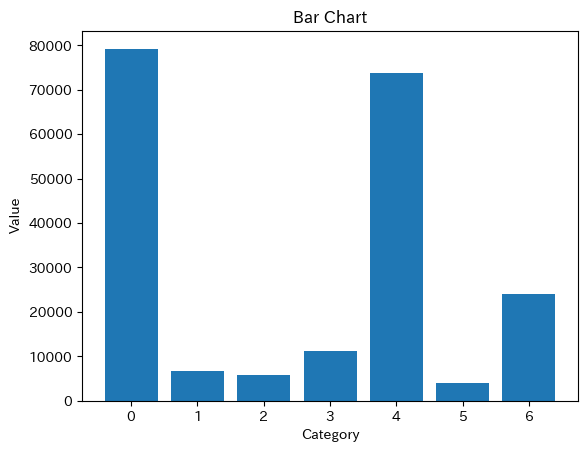

None


In [1]:
# sapnet.pyをインポート
from sapnet import sapnet
import random
import numpy as np

# 計算
getdatas=[1,2,4,8,16,32,64,128,256,512,1024]
message=''
indexs =[]

for getdata in getdatas:
    # 10回の施行を見る
    line_data = []
    for j in range(100):
        # 100回の拡散をランダムで行う
        df = sapnet.example_dataframe()
        for i in range(getdata):
            df = sapnet.stimulus_calc(df=df, stimulus=random.randint(1, len(df)))
            selected_index = sapnet.knowledge_selection(df)
            indexs.append(selected_index)
            # df = sapnet.attenuation(df,0.1)
            diagonal_matrix = np.diag(df.iloc[:, 1:].values)
        line_data.append(diagonal_matrix)

    # 行列の転置を求めることにより、それぞれの拡散の値を行列化
    # 行列化したそれぞれの要素を平均し、100回の拡散平均を求めます。
    transposed_line_data = np.transpose(line_data)

    # 各転置行列の平均を算出し、リストに追加
    averaged_lists = [np.mean(transposed_row) for transposed_row in transposed_line_data]
    print(averaged_lists)
    # 最後に生成したリストの平均を求めて出力
    overall_average = np.mean(averaged_lists)
    
    add_message = "{},{}".format(averaged_lists, overall_average)
    message = message + '\n' + add_message

print(message)
print(indexs)
print(sapnet.count_elements(indexs))
selection_list = sapnet.count_elements(indexs)
print(sapnet.create_selection_graph(selection_list))